<a href="https://colab.research.google.com/github/Wasian98/MATH-120-Final-Project/blob/main/MATH_120_Final_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATH 120 Final Project: Game Steam Stats for March 2025

#Environment Setup

Run the cell below to set up the environment for either Google Colab or local execution:

In [1]:
import os
import sys

# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")

    # Clone repository if in Colab
    if not os.path.exists('/content/MATH-120-Final-Project/'):
        !git clone https://github.com/Wasian98/MATH-120-Final-Project.git

    # Change to project directory
    os.chdir('/content/MATH-120-Final-Project')

except ImportError:
    IN_COLAB = False
    print("Running locally")

# Add src directory to Python path
if 'src' not in sys.path:
    sys.path.append('src')

print(f"Current working directory: {os.getcwd()}")

Running in Google Colab
Cloning into 'MATH-120-Final-Project'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 88 (delta 42), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (88/88), 88.25 KiB | 2.85 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Current working directory: /content/MATH-120-Final-Project


#Import Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from data_processing import load_raw_data, clean_data, save_cleaned_data
from analysis import summary_stats, highest_played_games, stats_by_genre


#Data Loading and Cleaning

In [3]:
# Load raw data
steam_raw = load_raw_data('/content/MATH-120-Final-Project/data_raw/games_march2025_full.csv')
print("\nFirst few rows of Steam data:")
print(steam_raw.head())


First few rows of Steam data:
    appid                             name release_date  required_age  price  \
0     730                 Counter-Strike 2   2012-08-21             0   0.00   
1  578080              PUBG: BATTLEGROUNDS   2017-12-21             0   0.00   
2     570                           Dota 2   2013-07-09             0   0.00   
3  271590        Grand Theft Auto V Legacy   2015-04-13            17   0.00   
4  488824  Tom Clancy's Rainbow Six® Siege   2015-12-01            17  19.99   

   dlc_count                               detailed_description  \
0          1  For over two decades, Counter-Strike has offer...   
1          0  LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2          2  The most-played game on Steam. Every day, mill...   
3          0  When a young street hustler, a retired bank ro...   
4          9  Edition Comparison Ultimate Edition The Tom Cl...   

                                      about_the_game  \
0  For over two decades, Coun

In [4]:
# Clean data
steam_clean = clean_data(steam_raw)

print("Cleaned and data shape:", steam_clean.shape)
print("\nData info:")
print(steam_clean.info())

Cleaned and data shape: (3576, 9)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      3576 non-null   object 
 1   release_date              3576 non-null   object 
 2   price                     3576 non-null   float64
 3   metacritic_score          3576 non-null   int64  
 4   genres                    3576 non-null   object 
 5   estimated_owners          3576 non-null   object 
 6   average_playtime_forever  3576 non-null   int64  
 7   average_playtime_2weeks   3576 non-null   int64  
 8   num_reviews_total         3576 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 251.6+ KB
None


In [5]:
# Save cleaned data
save_cleaned_data(steam_clean, 'data/processed_steam_data.csv')
print("Cleaned data saved to data/processed_steam_data.csv")

Cleaned data saved to data/processed_steam_data.csv


#Data Analysis

In [13]:
genres = stats_by_genre(steam_clean)
genres

                                                    genre_count  meta_score  \
genres                                                                        
['Action', 'Adventure', 'Casual', 'Indie']                   41   74.414634   
['Action', 'Adventure', 'Indie', 'RPG', 'Strate...           17   74.941176   
['Action', 'Adventure', 'Indie', 'RPG']                     113   72.681416   
['Action', 'Adventure', 'Indie', 'Simulation']               17   70.470588   
['Action', 'Adventure', 'Indie', 'Strategy']                 11   72.727273   
['Action', 'Adventure', 'Indie']                            282   72.996454   
['Action', 'Adventure', 'RPG']                               49   75.142857   
['Action', 'Adventure']                                     215   75.144186   
['Action', 'Casual', 'Indie']                                33   73.090909   
['Action', 'Indie', 'RPG', 'Strategy']                       12   71.000000   
['Action', 'Indie', 'RPG']                          

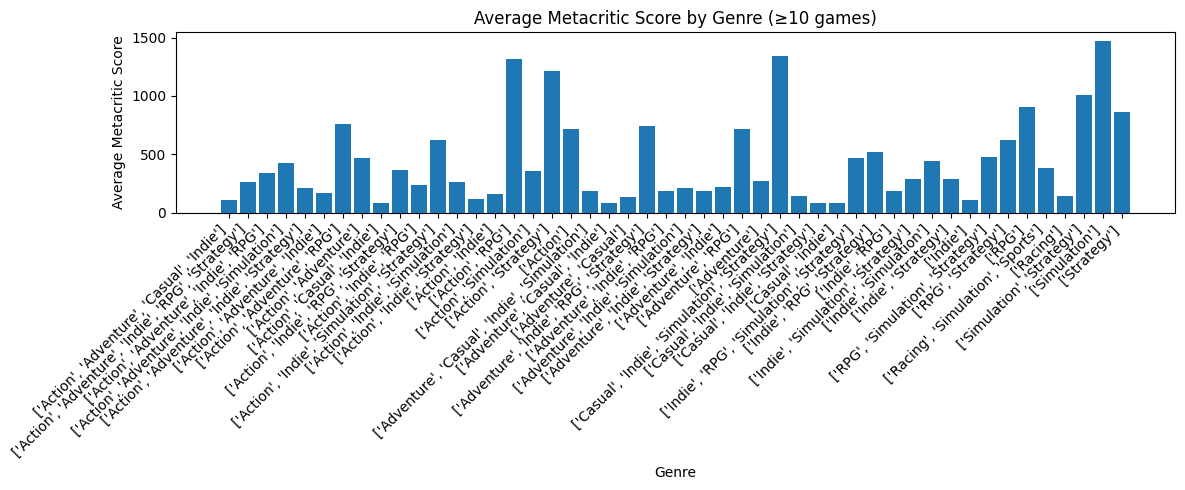

In [18]:
c = stats_by_genres(steam_clean)

plt.figure(figsize=(12,5))
plt.bar(c.index, c["average_playtime"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Metacritic Score")
plt.xlabel("Genre")
plt.title("Average Metacritic Score by Genre (≥10 games)")
plt.tight_layout()
plt.show()


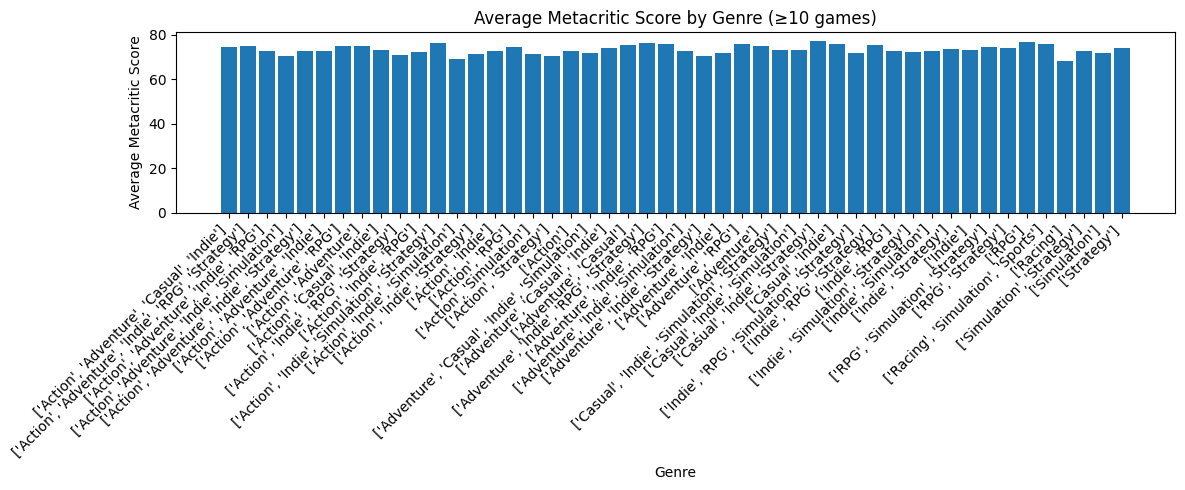

In [19]:
d = stats_by_genre(steam_clean)

plt.figure(figsize=(12,5))
plt.bar(c.index, c["meta_score"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Metacritic Score")
plt.xlabel("Genre")
plt.title("Average Metacritic Score by Genre (≥10 games)")
plt.tight_layout()
plt.show()

#Data Visualization

#Conclusions